# Markov Chain Monte Carlo example

Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

### (1) Shape definition

In [2]:
def isInside(xy) :
    "Circle of unit 1 with removed intersection with another circle"
    x = xy[0]
    y = xy[1]
    r1 = x*x + y*y
    r2 = x*x + (y+1)*(y+1)
    return int( (r1 < 1 ) and (r2 > 1))

### (2) Rejection technique Monte Carlo

In [3]:
# Integration range (common for all)

Xmin = -1.
Xmax = 1.

def mcGen(Nmc):

    xytab = np.empty(shape=(Nmc,2))
    
    imc = 0
    
    Nloop = 0

    while imc < Nmc:
        
        xytab[imc] = np.random.uniform(Xmin,Xmax,size=2)
        Nloop+=1
        imc+=isInside(xytab[imc])
    
    print(Nmc," points generated in ",Nloop," tries")
    
    return xytab

1000  points generated in  2167  tries


/tmp/ipykernel_84042/687745683.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(222)


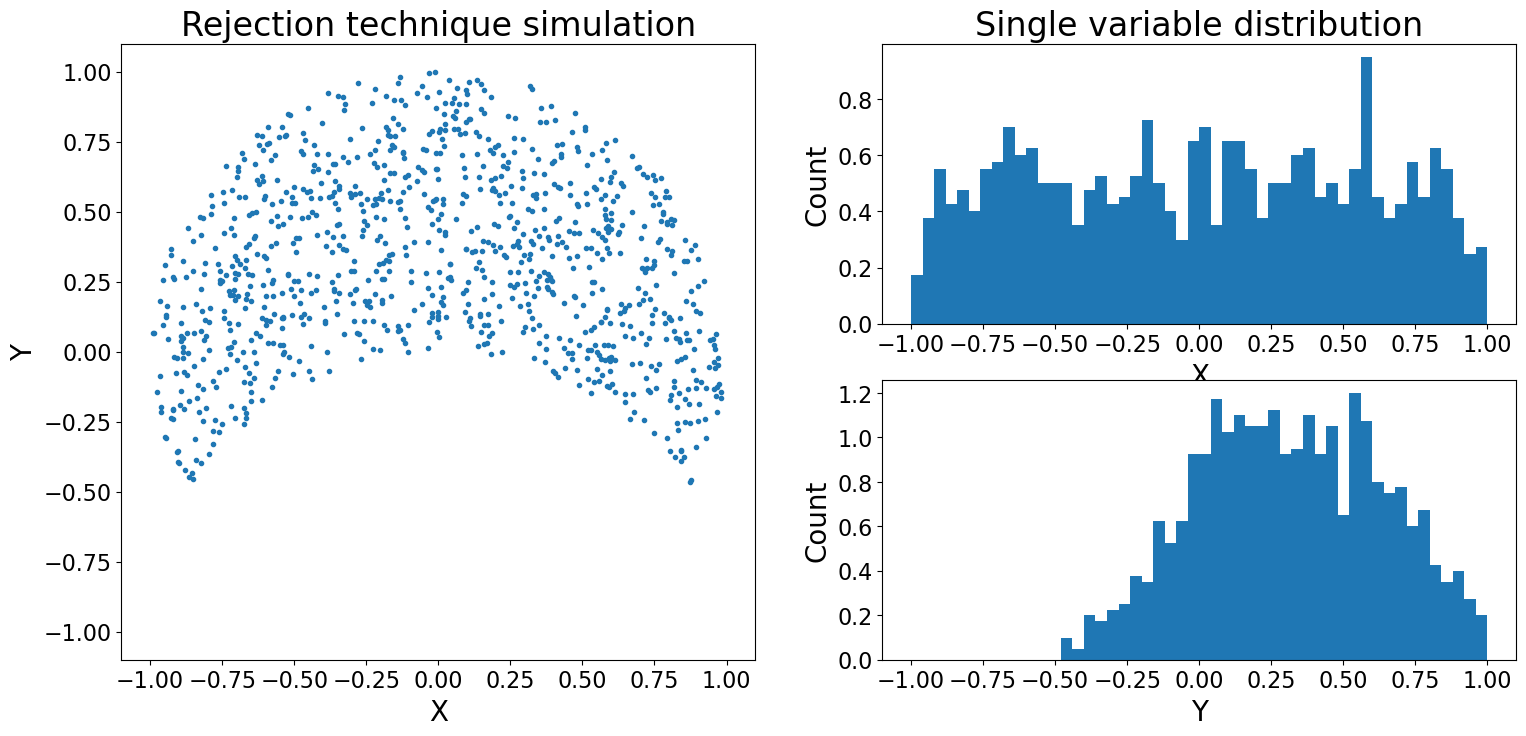

In [4]:
Nmc = 1000

xy = mcGen(Nmc)

# plt.figure(figsize=(10,8))
plt.subplots(1,2,figsize=(18, 8))

plt.subplot(121)

plt.plot(xy[:,0],xy[:,1],'.')
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])

plt.xlabel('X',size=20)
plt.ylabel('Y',size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Rejection technique simulation",size=24)

plt.subplot(222)

plt.hist(xy[:,0],density=True,log=False,bins=50,range=(-1.,1.))
         
plt.xlabel('X',size=20)
plt.ylabel('Count',size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Single variable distribution",size=24)


plt.subplot(224)

plt.hist(xy[:,1],density=True,log=False,bins=50,range=(-1.,1.))
         
plt.xlabel('Y',size=20)
plt.ylabel('Count',size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

fname = '14_mcmc_'+str(Nmc)+'.png'

plt.savefig(fname)

plt.show()

### (3) Markov Chain Monte Carlo

In [5]:
# Markov chain maximum step

dX = 1.0

def mcmcGen(Nmc):

    xytab = np.empty(shape=(Nmc,2))
    
    imc = 0
    
    xy = np.array([-0.8,0.])
    
    for imc in range(Nmc):
        
        dxy = np.random.uniform(-dX,dX,size=2)

        xy += dxy * isInside(xy+dxy)
        
        xytab[imc] = xy
    
    print(Nmc," points generated")
    
    return xytab

1000  points generated


/tmp/ipykernel_84042/32481621.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(222)


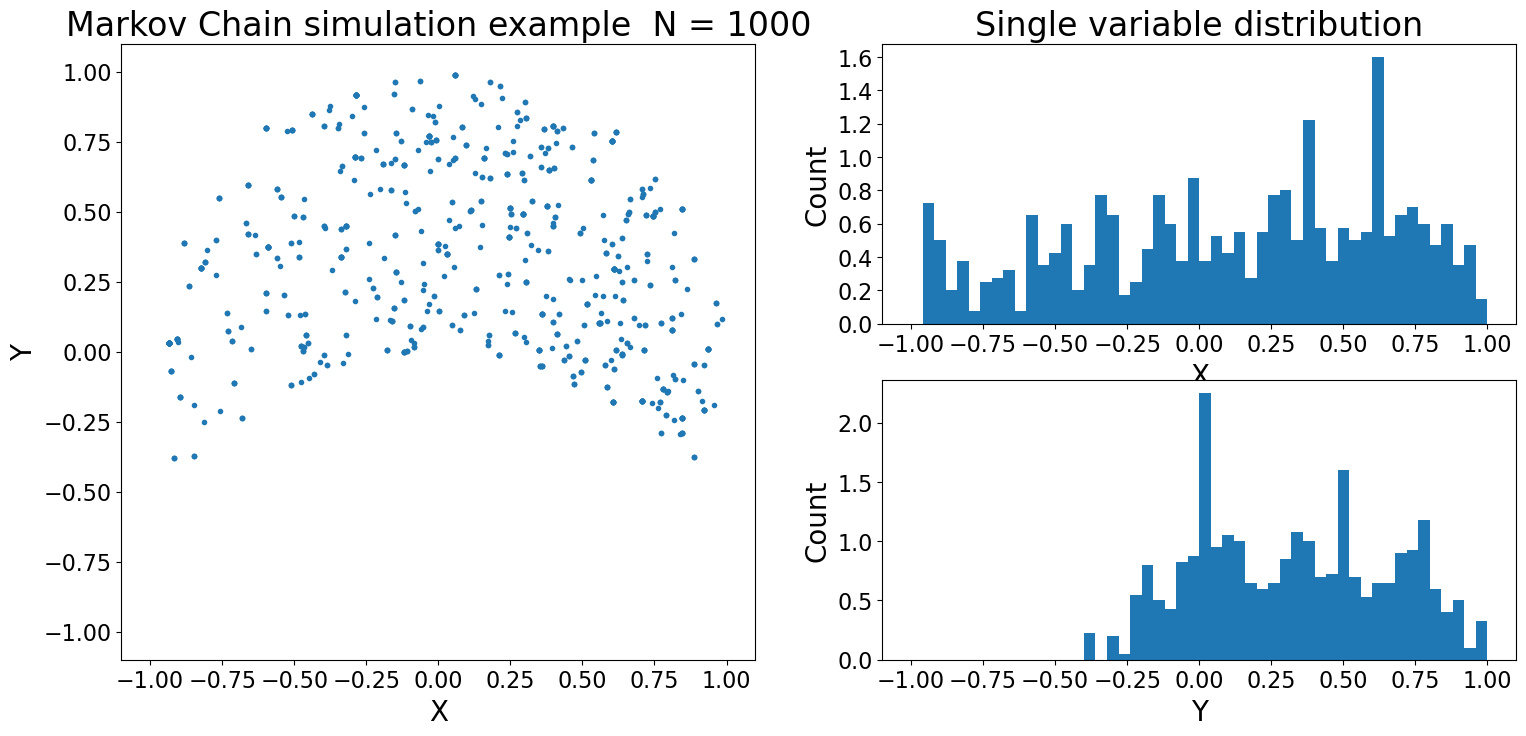

In [6]:
Nmc = 1000
xy2 = mcmcGen(Nmc)

# plt.figure(figsize=(10,8))
plt.subplots(1,2,figsize=(18, 8))

plt.subplot(121)

plt.plot(xy2[:,0],xy2[:,1],'.')
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
    
plt.xlabel('X',size=20)
plt.ylabel('Y',size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Markov Chain simulation example  N = "+str(Nmc),size=24)

plt.subplot(222)

plt.hist(xy2[:,0],density=True,log=False,bins=50,range=(-1.,1.))
         
plt.xlabel('X',size=20)
plt.ylabel('Count',size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Single variable distribution",size=24)


plt.subplot(224)

plt.hist(xy2[:,1],density=True,log=False,bins=50,range=(-1.,1.))
         
plt.xlabel('Y',size=20)
plt.ylabel('Count',size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


fname = '14_mcmc_'+str(dX)+'_'+str(Nmc)+'.png'

plt.savefig(fname,format='png')

plt.show()